# Project5: Niraj 
## Accident time series EDA



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [3]:
# Read the saved csv from the earlier notebook and set the index to the date_time column

df_accident_ts = pd.read_csv("./data/accident_ts_10years.csv", parse_dates= ['date_time'], index_col="date_time")

/Users/sarniraj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (3,6,8,11,20,24,26,28,30,32,34,36,38,40,42,44,48,50,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# sort and reset the DateTimeIndex
df_accident_ts.reset_index()
df_accident_ts.sort_index(inplace=True)

In [5]:
# Confirm read file properly. 
# The nulls in monthname are due to the data not being in the files in years prior to 2015, but we're not using them 
# so don't need to clean them up

df_accident_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353764 entries, 2010-01-01 00:01:00 to 2020-12-31 23:51:00
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 353764 non-null  int64  
 1   month                353764 non-null  int64  
 2   monthname            203465 non-null  object 
 3   day                  353764 non-null  int64  
 4   day_week             353764 non-null  int64  
 5   day_weekname         203465 non-null  object 
 6   hour                 353764 non-null  int64  
 7   hourname             203465 non-null  object 
 8   minute               353764 non-null  int64  
 9   state                353764 non-null  int64  
 10  statename            203465 non-null  object 
 11  county               353764 non-null  int64  
 12  st_case              353764 non-null  int64  
 13  ve_total             353764 non-null  int64  
 14  ve_forms             353764 non-nu

In [6]:
 df_accident_ts.tail() # nothing exciting...

,year,month,monthname,day,day_week,day_weekname,hour,hourname,minute,state,...,arr_min,arr_minname,fatals,drunk_dr,day_3hr_window,day_3hr_window_name,day_2hr_window,day_2hr_window_name,day_4hr_window,day_4hr_window_name
date_time,,,,,,,,,,,,,,,,,,,,,
2020-12-31 23:32:00,2020,12,December,31,5,Thursday,23,11:00pm-11:59pm,32,21,...,52,52,1,0,40,Thursday 21:00 to 24:00,60,Thursday 22:00 to 24:00,30,Thursday 20:00 to 24:00
2020-12-31 23:36:00,2020,12,December,31,5,Thursday,23,11:00pm-11:59pm,36,48,...,98,Unknown if Arrived,1,0,40,Thursday 21:00 to 24:00,60,Thursday 22:00 to 24:00,30,Thursday 20:00 to 24:00
2020-12-31 23:50:00,2020,12,December,31,5,Thursday,23,11:00pm-11:59pm,50,6,...,99,Unknown EMS Scene Arrival Minutes,1,0,40,Thursday 21:00 to 24:00,60,Thursday 22:00 to 24:00,30,Thursday 20:00 to 24:00
2020-12-31 23:50:00,2020,12,December,31,5,Thursday,23,11:00pm-11:59pm,50,6,...,99,Unknown EMS Scene Arrival Minutes,1,0,40,Thursday 21:00 to 24:00,60,Thursday 22:00 to 24:00,30,Thursday 20:00 to 24:00
2020-12-31 23:51:00,2020,12,December,31,5,Thursday,23,11:00pm-11:59pm,51,6,...,99,Unknown EMS Scene Arrival Minutes,1,1,40,Thursday 21:00 to 24:00,60,Thursday 22:00 to 24:00,30,Thursday 20:00 to 24:00


In [7]:
# Drop Unnamed column if it exists
#df_accident_ts.drop(columns="Unnamed: 0", inplace=True)

In [8]:
df_accident_ts.index.isnull().sum() # removed all nulls before creating the index and saving to csv (in earlier notebook)

0

In [9]:
# See relavant accident data 
df_accident_ts[['year', "month", "day_week", "hour", "minute", "day_3hr_window", "day_3hr_window_name", "fatals", "drunk_dr"]].tail()


,year,month,day_week,hour,minute,day_3hr_window,day_3hr_window_name,fatals,drunk_dr
date_time,,,,,,,,,
2020-12-31 23:32:00,2020,12,5,23,32,40,Thursday 21:00 to 24:00,1,0
2020-12-31 23:36:00,2020,12,5,23,36,40,Thursday 21:00 to 24:00,1,0
2020-12-31 23:50:00,2020,12,5,23,50,40,Thursday 21:00 to 24:00,1,0
2020-12-31 23:50:00,2020,12,5,23,50,40,Thursday 21:00 to 24:00,1,0
2020-12-31 23:51:00,2020,12,5,23,51,40,Thursday 21:00 to 24:00,1,1


### Draw graphs showing fatalities in our 2-, 3- and 4-hour windows

<Figure size 720x864 with 0 Axes>

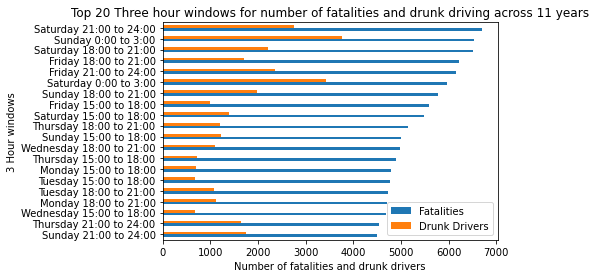

In [10]:
# Number of accidents in one hour windows were not very informative, but 3 and 4 hour windows are a lot more informative! 
# Start by looking at all the 11 years, then look at just 2020, then focus on Holidays in 2020 because there are some very 
# interesting trends on Holidays

plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Three hour windows for number of fatalities and drunk driving across 11 years");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("3 Hour windows");
plt.legend(labels=labels);




### **Interpretation** : 
The most number of fatal accidents are on Saturdays from 9pm-midnight (first row), followed by Sunday 12:01 to 3am. 
The most fatal accidents involving drunk drivers are on Sunday 12:01 to 3am i.e late Saturday night, followed by Saturday midnight to 3am, i.e late Friday night. 


In [11]:
#df_accident_ts[df_accident_ts["year"]==2020].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
#                                                    ascending=False)[["fatals", "drunk_dr"]].head(9).sort_values( by="fatals", ascending=False)


In [12]:
#9795/38491 : 25.5% 
# 3497/9415: 37.1%

<Figure size 720x864 with 0 Axes>

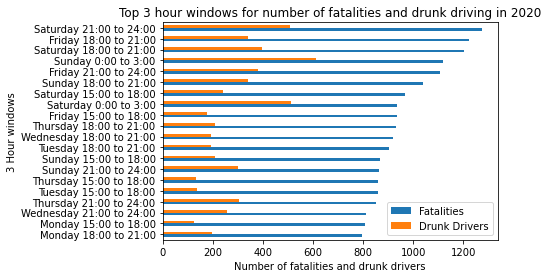

In [29]:
# Now look at data just in the one year, 2020
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];

df_accident_ts[df_accident_ts["year"]==2020].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 3 hour windows for number of fatalities and drunk driving in 2020");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("3 Hour windows");
plt.legend(labels=labels);



### **Interpretation** : 
The trends for 2020 are very similar to those for all the 11 years. The first spot remains Saturday 9pm to midnight.   
Main differences: 
- The second spot becomes Friday 6-9pm instead of late Saturday night. 
- Drunk driving involved fatalities remain the same - midnight to 3am on Friday and Saturday. 



In [14]:
# Find max percent of drinking drivers and peds by 3 hour window 
#df_group_2020 = df_accident_ts[df_accident_ts["year"]==2020].groupby(by=["day_3hr_window_name"])[['fatals', "drunk_dr", "peds"]].agg(['sum', 'count'])
##df_group_2020["drunk_percent"] = round( ( df_group_2020["drunk_dr", "sum"]/df_group_2020["fatals", "sum"] * 100), 2) 
#df_group_2020["peds_percent"] = round( ( df_group_2020["peds", "sum"]/df_group_2020["fatals", "sum"] * 100), 2) 
#df_group_2020.sort_values(by= "drunk_percent", ascending=False).head(10)["drunk_percent"].sort_values( ascending = True).plot(kind="barh", 
#                                                    title = "Highest percent of fatalities caused by drinking drivers by 3 hour windows in 2020");


#df_group = df_accident_ts.groupby(by=["day_3hr_window_name"])[['fatals', "drunk_dr", "peds"]].agg(['sum', 'count'])
#df_group["drunk_percent"] = round( ( df_group["drunk_dr", "sum"]/df_group["fatals", "sum"] * 100), 2) 
#df_group["peds_percent"] = round( ( df_group["peds", "sum"]/df_group["fatals", "sum"] * 100), 2) 


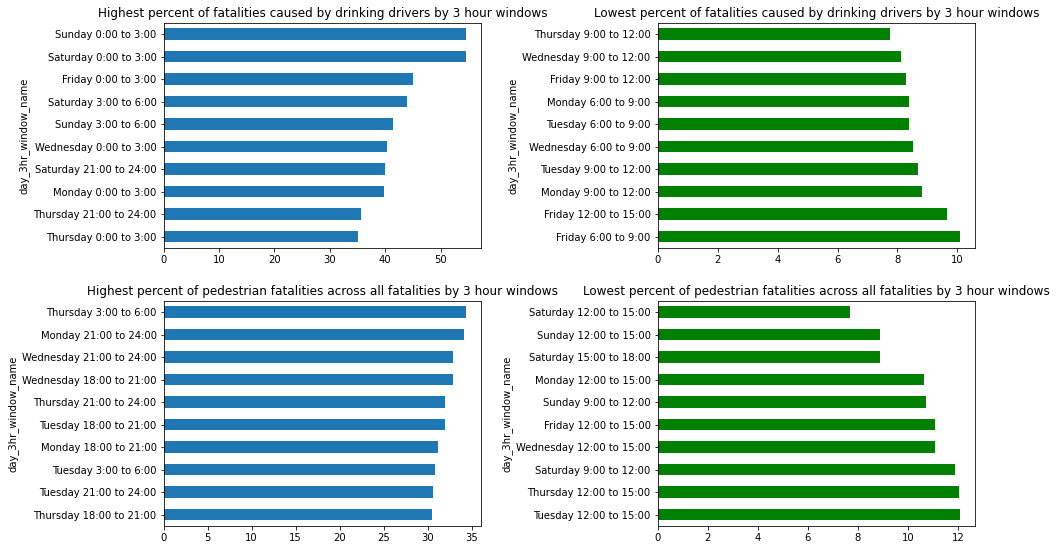

In [15]:
# Find max percent of drinking drivers and peds by 3 hour window in 2020

df_group_2020 = df_accident_ts[df_accident_ts["year"]==2020].groupby(by=["day_3hr_window_name"])[['fatals', "drunk_dr", "peds"]].agg(['sum', 'count'])
df_group_2020["drunk_percent"] = round( ( df_group_2020["drunk_dr", "sum"]/df_group_2020["fatals", "sum"] * 100), 2) 
df_group_2020["peds_percent"] = round( ( df_group_2020["peds", "sum"]/df_group_2020["fatals", "sum"] * 100), 2) 

plt.figure(figsize=(14,8))

# 2 rows, 2 columns
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

df_group_2020.sort_values(by= "drunk_percent", ascending=False).head(10)["drunk_percent"].sort_values( ascending = True).plot(kind="barh", 
                                                    ax=ax1, title = "Highest percent of fatalities caused by drinking drivers by 3 hour windows");


df_group_2020.sort_values(by= "drunk_percent", ascending=True).head(10)["drunk_percent"].sort_values( ascending = False).plot(kind="barh", color="green",
                                                    ax=ax2, title = "Lowest percent of fatalities caused by drinking drivers by 3 hour windows");

df_group_2020.sort_values(by= "peds_percent", ascending=False).head(10)["peds_percent"].sort_values( ascending = True).plot(kind="barh", 
                                                    ax=ax3, title = "Highest percent of pedestrian fatalities across all fatalities by 3 hour windows");

df_group_2020.sort_values(by= "peds_percent", ascending=True).head(10)["peds_percent"].sort_values( ascending = False).plot(kind="barh", color="green",
                                                    ax=ax4, title = "Lowest percent of pedestrian fatalities across all fatalities by 3 hour windows");
plt.tight_layout(h_pad=2, pad=2, w_pad=2)


#### **Interpretation** : 
In 2020, 55% of fatalities were caused by drinking drivers during the worst 3 hour window of Sunday midnight to 3am. 
Overall across all 11 years, it was 57%.   

Only 8% of fatalities are caused by drinking drivers on Wednesday and Thursday from 9am-noon.   

In 2020, there were 38491 fatalities. Average of 105 per day, or 4.4 per hour.  
During the worst 3 hour window of Saturday 21:00 to 24:00, there were a total of 1273 fatalities in 2020, average of 24.5 per week per this 3 hour window, i.e. 8.1 per hour. During Labor Day, it went up to 11 per hour. 

This is 1.84 times the hourly average of 4.4. 

In 2020, there were 9415 drinking driver fatalities. Average of 25.8 per day, or 1.1 per hour
During the worst 3 hour window of Sunday 0:00 to 3:00, there were a total of 610 drinking driver fatalities in 2020, average of 11.7 per week per this 3 hour window, i.e. 3.9 per hour. During Labor Day, it went up to 5.6 per hour. 

This is 3.5 times the hourly averge of 1.1 

Percent:
In 2020, 24.5% of fatalities (9415 out of 38491) involved drinking drivers. During weekend nights, this percent went up to 55%. During Labor Day, it went up to 89.5%

Holidays: 
Labor Day: 

Sunday 0:00 to 3:00	**19	17**	1	Labor Day	89.47  
Saturday 0:00 to 3:00	20	15	7	Labor Day	75.00  
Sunday 21:00 to 24:00	**33**	9	9	Labor Day	27.27  
Saturday 18:00 to 21:00	32	13	3	Labor Day	40.62  

<Figure size 720x864 with 0 Axes>

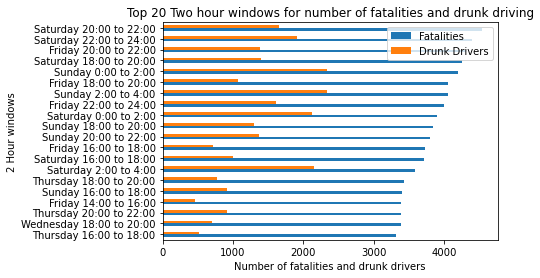

In [16]:
# Check if trends are different in 2 hour windows

plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_2hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Two hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("2 Hour windows");
plt.legend(labels=labels);


<Figure size 720x864 with 0 Axes>

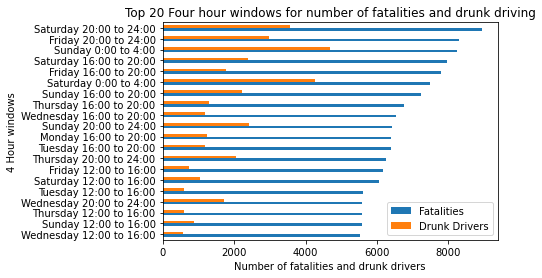

In [17]:
# Check if trends are different in 4 hour windows

plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_4hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Four hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("4 Hour windows");
plt.legend(labels=labels);


#### **Interpretation** : 
2 and 4 hour widows have similar trends to the 3 hour windows. 
We'll use the 3 hour windows going forward. 


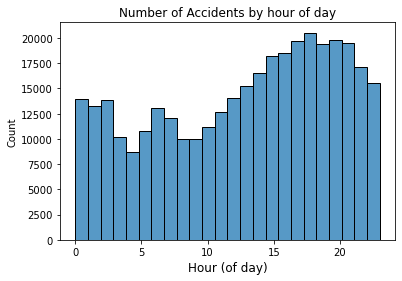

In [18]:
# Accidents by hour
plt.figure( figsize=(6,4))

# For the plot ignore the unknown (99) hours - they are less than 1%
sns.histplot(df_accident_ts[df_accident_ts['hour'] < 99 ]['hour'], bins = 24);
plt.title( "Number of Accidents by hour of day")
plt.xlabel("Hour (of day)", fontsize=12);
#plt.ylabel("Obscured By", fontsize=12);

# 6-10pm have the most accidents. Hour of day by itself is not revelaing, need to combine with weekend to see reall pattern



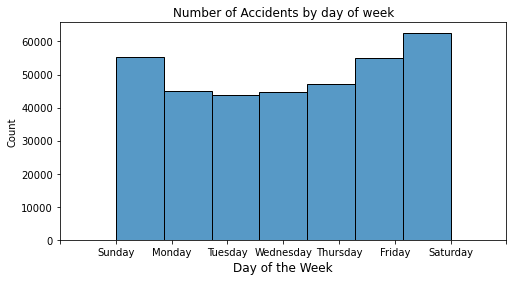

In [19]:

#Sun=1; Sat=7
day_weeknames = ["", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", ""]

# Accidents by day of week. Military time: midnight is 0000 (hour 0)
plt.figure( figsize=(8,4))
sns.histplot(df_accident_ts['day_week'] , bins = 7);

#sns.histplot(df_accident_ts['day_weekname'] , bins = 7);
plt.title( "Number of Accidents by day of week")
ticks_loc = plt.xticks()
plt.xticks(ticks_loc[0], day_weeknames)
plt.xlabel("Day of the Week", fontsize=12);
#plt.ylabel("Obscured By", fontsize=12);

# Saturday have the most accidents, followed by Sunday (probably Saturday night past midnight)



In [20]:
#df_accident[df_accident['day_week'] < 99 ]['hour'], bins = 24);
# 1 is Sunday; 7 is Saturday
df_accident_ts['day_week'].value_counts()

7    62642
1    55390
6    54955
5    47114
2    45090
4    44817
3    43756
Name: day_week, dtype: int64

<Figure size 864x576 with 0 Axes>

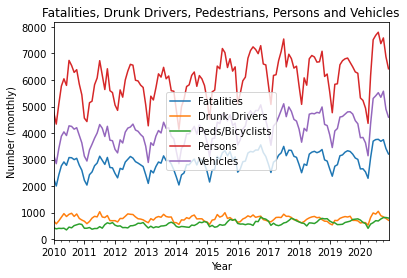

In [26]:
labels = ["Fatalities", "Drunk Drivers", "Peds/Bicyclists", "Persons", "Vehicles"]
plt.figure(figsize=(12,8));
df_accident_ts.resample("M").sum()[["fatals", "drunk_dr", "peds", "persons", "ve_total"]].plot()

plt.title ("Fatalities, Drunk Drivers, Pedestrians, Persons and Vehicles");
plt.xlabel("Year");
plt.ylabel( "Number (monthly)");
plt.legend( labels, loc='center');



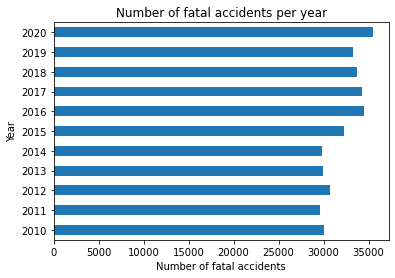

In [26]:
# observations per year
df_accident_ts['year'].value_counts(sort=False).plot(kind="barh");

#df_accident_ts.resample("M").count().plot();
plt.title ("Number of fatal accidents per year");
plt.xlabel("Number of fatal accidents");
plt.ylabel( "Year");

#### **Interpretation** : 
The number of accidents is roughly increasing every year 

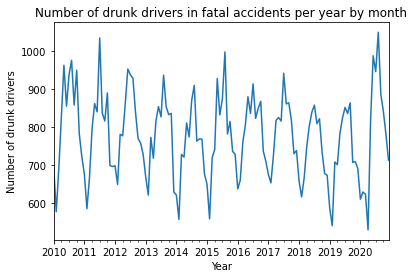

In [94]:
# Drunk drivers per year

df_accident_ts.resample("M")['drunk_dr'].sum().plot();
plt.title ("Number of drunk drivers in fatal accidents per year by month");
plt.ylabel("Number of drunk drivers");
plt.xlabel( "Year");

In [31]:
# Check drunk driving during holidays in 2020

holidays = pd.DataFrame ({
    "holiday": ["NewYears", "Memorial Day", "Fourth of July", "Labor Day", "Thanksgiving", "Christmas"], 
    "start": ["2019-12-31 18:00", "2020-05-22 18:00", "2020-07-02 18:00", "2020-09-04 18:00", "2020-11-25 18:00", "2020-12-24 18:00"],
    "end": ["2020-01-02 05:59", "2020-05-26 05:59",  "2020-07-06 05:59",  "2020-09-08 05:59",  "2020-11-30 05:59",  "2020-12-28 05:59"],
    "fatals_sum" : [0]*6,
    "drunk_dr_sum" : [0]*6,
    "peds_sum" : [0]*6,
    "drunk_percent": [0]*6,
    "peds_percent": [0]*6,
})
 

In [96]:

# Across all holidays in 2020
                   
for i in range(0, holidays.shape[0]):
    #print( df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["fatals", "drunk_dr"]].sum())
    holidays["fatals_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["fatals"]].sum()
    holidays["drunk_dr_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["drunk_dr"]].sum()
    holidays["peds_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["peds"]].sum()
    holidays["drunk_percent"][i] =  round(( (holidays["drunk_dr_sum"][i]/holidays["fatals_sum"][i]) * 100), 2)
    holidays["peds_percent"][i] =  round(( (holidays["peds_sum"][i]/holidays["fatals_sum"][i]) * 100), 2)


/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/1839578580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays["fatals_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["fatals"]].sum()
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/1839578580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays["drunk_dr_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["drunk_dr"]].sum()
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/1839578580.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [33]:

holidays

,holiday,start,end,fatals_sum,drunk_dr_sum,peds_sum,drunk_percent,peds_percent
0,NewYears,2019-12-31 18:00,2020-01-02 05:59,152,70,39,46,25
1,Memorial Day,2020-05-22 18:00,2020-05-26 05:59,404,157,73,38,18
2,Fourth of July,2020-07-02 18:00,2020-07-06 05:59,488,171,83,35,17
3,Labor Day,2020-09-04 18:00,2020-09-08 05:59,524,169,99,32,18
4,Thanksgiving,2020-11-25 18:00,2020-11-30 05:59,511,136,120,26,23
5,Christmas,2020-12-24 18:00,2020-12-28 05:59,333,100,77,30,23


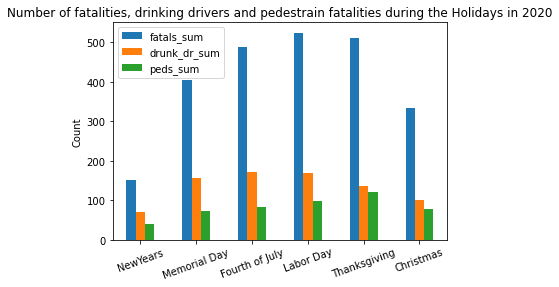

In [97]:
# Number of fatalities, drinking drivers and pedestrain fatalities during the Holidays in 2020

holidays[["fatals_sum", "drunk_dr_sum", "peds_sum"]].plot(kind= 'bar', 
                                                    title="Number of fatalities, drinking drivers and pedestrain fatalities during the Holidays in 2020");
plt.xticks(range(0,6), holidays["holiday"], rotation=20);
plt.ylabel("Count");


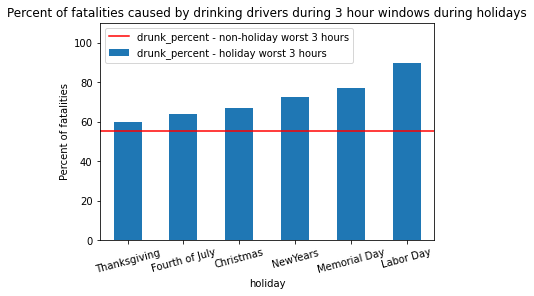

In [98]:
# Percent of fatalities caused by drinking drivers during 3 hour windows during holidays

df_hol_stats_list = pd.DataFrame()

for i in range(0, holidays.shape[0]):
    #print( i)
    df_hol_stats= pd.DataFrame()
    
    df_hol_stats = (df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                    ascending=False)[["fatals", "drunk_dr", "peds"]].sort_values(by="drunk_dr", ascending=False))
    
    df_hol_stats["holiday"] = holidays.iloc[i]["holiday"]

    df_hol_stats["drunk_percent"] = round( ( df_hol_stats["drunk_dr"]/df_hol_stats["fatals"] * 100 ), 2) 
    df_hol_stats_list = df_hol_stats_list.append(df_hol_stats)
    
    #df_hol_stats.sort_values(by="drunk_percent", ascending=True)

df_hol_stats_list.groupby('holiday')["drunk_percent"].max().sort_values().plot(kind="bar", label= "drunk_percent - holiday worst 3 hours")

plt.title(f"Percent of fatalities caused by drinking drivers during 3 hour windows during holidays");
plt.axhline( 55, color = "red", label="drunk_percent - non-holiday worst 3 hours")
plt.ylabel("Percent of fatalities");
plt.ylim(0, 110)
plt.xticks(rotation=15);
plt.legend(loc=2);


#### **Interpretation** : 
During Holidays, there are many more fatalities caused by drinking drivers than during the worst 3 hour windows on non-holidays.   
During the Labor Day weekend, 90% of the 19 fatalities were caused by drinking drivers on Sun between midnight and 3am, and 75% of the 20 fatalities on Sat between midnight and 3am. Both these percentages are well above the 55% of drinking driver fatalilities on non-holiday weekends.   

In 2020, of the total 9415 drinking driver fatalilites, 803 (8.5%) were during the 6 holidays. Fatalities were 2412 (6.3%) during the Holidays

Holidays: 803, 2412; 2020: 9415, 38491  

Sunday 0:00 to 3:00	**19	17**	1	Labor Day	89.47  
Saturday 0:00 to 3:00	20	15	7	Labor Day	75.00  
Sunday 21:00 to 24:00	**33**	9	9	Labor Day	27.27  
Saturday 18:00 to 21:00	32	13	3	Labor Day	40.62  

Number of fatalities and Drinking Drivers, with percent of drinking drivers
<img src="./data/DrunkDriver_stats.png"  width="800" height="250">  


In [181]:
df_percent_stats= pd.DataFrame( {
    
    "Period": ["Per Day Avg", "Per 3 Hours Avg", "Best-Wed 9am-noon", "Sat 12:01-3am", "Labor Day: Sun 9pm-12am"],
    "Percent Drunk Drivers": [24.5, 24.5, 8, 55, 89.5]
    
})


In [182]:
df_percent_stats

,Period,Percent Drunk Drivers
0,Per Day Avg,24.5
1,Per 3 Hours Avg,24.5
2,Best-Wed 9am-noon,8.0
3,Sat 12:01-3am,55.0
4,Labor Day: Sun 9pm-12am,89.5


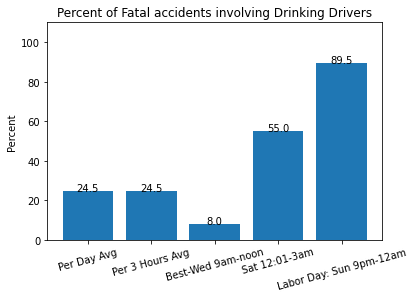

In [183]:
# Bar chart with labels on top; xticks with custom tick and labels
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center")
        # should the first param be i or i-1; web says i; but it was skipping one col
#        plt.text(i,y_list[i-1],y_list[i-1], ha="center") 

        

plt.figure(figsize=(6,4))
plt.bar(df_percent_stats["Period"], df_percent_stats["Percent Drunk Drivers"])

add_value_label(df_percent_stats["Period"], df_percent_stats["Percent Drunk Drivers"])

plt.title("Percent of Fatal accidents involving Drinking Drivers")
plt.xticks(rotation=15);
plt.ylim(0, 110);
plt.ylabel("Percent");



#### **Interpretation**: 
On average, 24.5% of fatalities involve drinking drivers. During the best 3 hour window, on Wednesdays between 9am and noon, only 8% of fatalities are caused by Drinking Drivers.   

However, during the worst 3 hour window which is late Saturday night - i.e. Sunday 12:00am-3am, the percentage goes up to 55% and even worse is on Holidays like Labor Day when the percentage is 89.5%. 

The range is from 8% to 90% - this clearly calls for better sobriety checks and/or roving patrols during the hours from 9pm to 3am on Holidays and weekends. 



In [177]:
df_display_stats= pd.DataFrame( {
    "Type": ["Fatalities", "Drunk Drivers", "Percent Drunk Drivers"], 
    "Total in 2020" : [38491, 9415, 24.5],
    "Per Day Avg":	[105.5, 25.8, 24.5], 
    "Per 3 Hours Avg":	[13.2, 3.2, 24.5], 
    "Late Sat 12:01-3am":	[24.5, 11.7, 55.0], 
    "Labor Day: Sun 9pm-12am":	[33.0, 17.0, 89.5], 	
    #"Lowest-Wed 9am-noon":	[""]
    
})

df_display_stats.T

,0,1,2
Type,Fatalities,Drunk Drivers,Percent Drunk Drivers
Total in 2020,38491.0,9415.0,24.5
Per Day Avg,105.5,25.8,24.5
Per 3 Hours Avg,13.2,3.2,24.5
Late Sat 12:01-3am,24.5,11.7,55.0
Labor Day: Sun 9pm-12am,33.0,17.0,89.5


In [178]:
df_display_stats.set_index("Type", inplace=True)

In [179]:
df_display_stats.T

Type,Fatalities,Drunk Drivers,Percent Drunk Drivers
Total in 2020,38491.0,9415.0,24.5
Per Day Avg,105.5,25.8,24.5
Per 3 Hours Avg,13.2,3.2,24.5
Late Sat 12:01-3am,24.5,11.7,55.0
Labor Day: Sun 9pm-12am,33.0,17.0,89.5


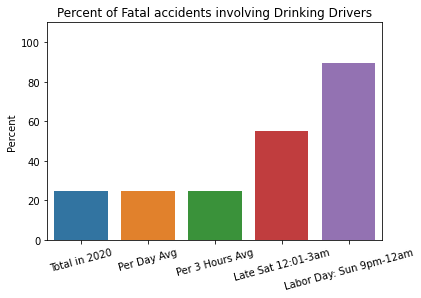

In [180]:
sns.barplot(data=df_display_stats[df_display_stats.index == "Percent Drunk Drivers"])

plt.title("Percent of Fatal accidents involving Drinking Drivers")
plt.xticks(rotation=15);
plt.ylim(0, 110);
plt.ylabel("Percent");
#df_display_stats[df_display_stats.index == "Percent Drunk Drivers"].T.plot(kind="bar" )


In [99]:
# stats
df_accident_ts[df_accident_ts["year"]==2020][["fatals", "drunk_dr"]].sum()

fatals      38491
drunk_dr     9415
dtype: int64

In [ ]:
df_hol_stats_list[df_hol_stats_list["holiday"] == "Labor Day"].sort_values(by="fatals", ascending=False)

,fatals,drunk_dr,peds,holiday,drunk_percent
day_3hr_window_name,,,,,
Sunday 21:00 to 24:00,33,9,9,Labor Day,27.27
Saturday 18:00 to 21:00,32,13,3,Labor Day,40.62
Friday 21:00 to 24:00,31,10,12,Labor Day,32.26
Saturday 21:00 to 24:00,31,8,12,Labor Day,25.81
Monday 21:00 to 24:00,27,10,9,Labor Day,37.04
Friday 18:00 to 21:00,24,10,4,Labor Day,41.67
Saturday 15:00 to 18:00,24,8,1,Labor Day,33.33
Sunday 18:00 to 21:00,23,3,3,Labor Day,13.04
Saturday 12:00 to 15:00,22,5,0,Labor Day,22.73


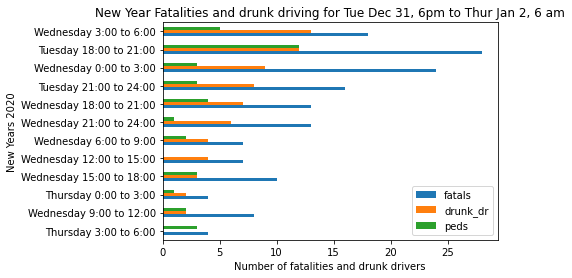

In [100]:
# New Year stats are similar to Labor Day

df_accident_ts.loc["2019-12-31 18:00": '2020-01-02 05:59'].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                ascending=False)[["fatals", "drunk_dr", "peds"]].head(20).sort_values(by="drunk_dr", ascending=True).plot(kind= 'barh');

plt.title(f"New Year Fatalities and drunk driving for Tue Dec 31, 6pm to Thur Jan 2, 6 am");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("New Years 2020");


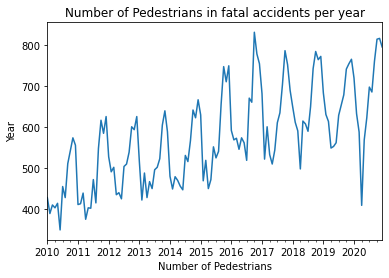

In [102]:
# Peds
df_accident_ts.resample("M")['peds'].sum().plot();
plt.title ("Number of Pedestrians in fatal accidents per year");
plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year");

In [ ]:
df_accident_ts.groupby(by="year")['peds'].sum() 
# a little bit higher than the stats on NHTSA: 
# https://www-fars.nhtsa.dot.gov/Trends/TrendsGeneral.aspx

year
2010    5459
2011    5706
2012    6195
2013    6127
2014    6327
2015    7023
2016    7633
2017    7572
2018    7880
2019    7818
2020    8115
Name: peds, dtype: int64

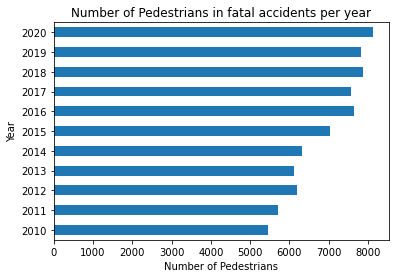

In [ ]:
# Pedestrains per year

df_accident_ts.groupby(by="year")['peds'].sum().plot(kind="barh");

plt.title ("Number of Pedestrians in fatal accidents per year");
plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year");

In [ ]:
df_accident_ts["cityname"].value_counts().sum() # SF has only 149 and is ranked 70, LA has 1387; NA: 84k!!
# 8k cities; total rows: 171178; half have Not Applicable (outside city limits)

# city: SF=3290
# state: CA: 6: 33k records


171178

Text(0.5, 1.0, 'Number of accidents by State')

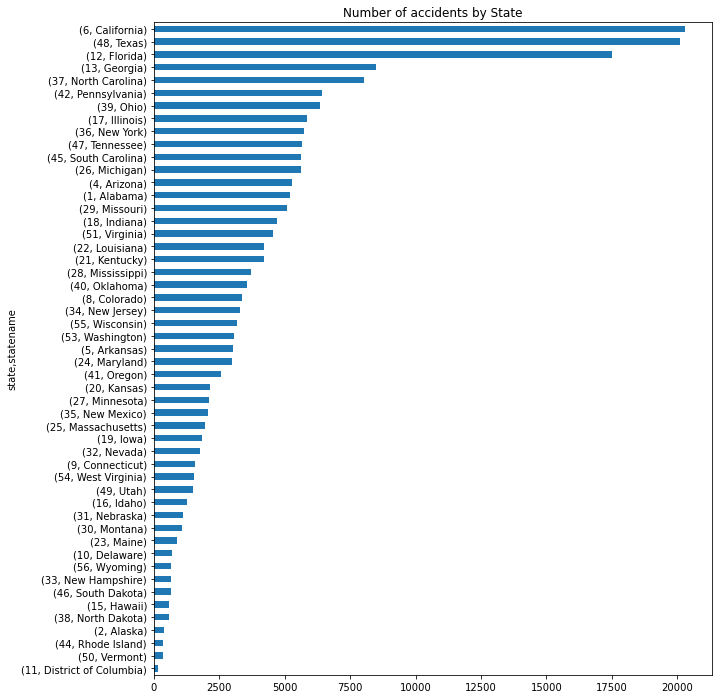

In [ ]:
plt.figure( figsize=(10,12))
df_accident_ts[["state", "statename"]].value_counts(ascending=True).plot(kind="barh")
plt.title("Number of accidents by State")

<AxesSubplot:xlabel='date_time'>

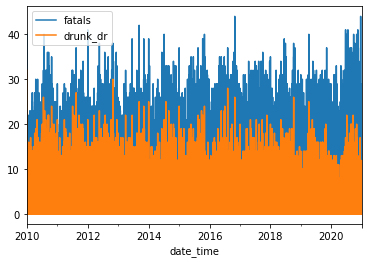

In [ ]:
 # sum in 3hour windows
df_accident_ts.resample("3H").sum()[["fatals", "drunk_dr"]].plot()